## Voting Data


In [102]:
from selenium import webdriver 
import pandas as pd 
from selenium.webdriver.chrome.service import Service as ChromeService 
from webdriver_manager.chrome import ChromeDriverManager 
from selenium.webdriver.common.by import By 
import time 
import numpy as np 
import requests 

In [103]:
general1 = pd.read_csv('2022General.csv')

In [104]:
general1.head()

,State,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Denominators,Unnamed: 6,VEP Components (Modifications to VAP to Calculate VEP),Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,Preliminary Total Turnout Estimate,Status,Source,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
1,United States,"112,030,874",NaN,NaN,46.2%,"242,690,810","261,673,203",7.5%,"1,157,707","1,145,315","340,972","2,643,994","3,129,152",NaN
2,Alabama*,"1,424,087",Certified,https://www2.alabamavotes.gov/electionnight/st...,37.3%,"3,820,009","3,977,770",2.3%,"25,328","32,711","8,245","66,284",NaN,AL
3,Alaska,"267,047",Official,https://www.elections.alaska.gov/election-resu...,50.2%,"531,448","558,308",3.5%,"4,578","1,682","1,003","7,263",NaN,AK
4,Arizona,"2,592,313",Certified,https://azsos.gov/elections,49.3%,"5,257,070","5,806,140",7.9%,"34,997","50,333","6,887","92,217",NaN,AZ


In [105]:
general1.columns = ['State', 'Total Ballots Counted', 'Status', 'Source', 'Preliminary Turnout Rate', 
                 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)', '% Non-Citizen', 'Prison', 'Probabtion', 
                 'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'State Abrv']

In [106]:
Party = ['N/A', 'N/A', 'Republican', 'Republican', 'Democrat', 'Republican', 'Democrat', 'Democrat', 'Democrat', 'Democrat', 'N/A', 
        'Republican', 'Republican', 'Democrat', 'Republican', 'Democrat', 'Republican', 'Republican', 'Democrat', 'Democrat', 
         'Democrat', 'Democrat', 'Democrat', 'Democrat', 'Democrat', 'Democrat', 'Republican', 'Republican', 'Republican', 
          'Republican', 'Republican', 'Republican', 'Democrat', 'Democrat', 'Democrat', 'Democrat', 'Republican', 'Republican', 'Republican', 
           'Democrat', 'Democrat', 'Democrat', 'Republican','Republican','Republican','Republican','Republican','Republican','Republican',
            'Democrat', 'Republican', 'Democrat', 'Republican', 'N/A']

In [107]:
general1['Party'] = Party 

In [108]:
general1 = general1.drop(10)
general1 = general1.drop(53)

In [109]:
general1 = general1[1:] 
new_headers = general1.iloc[0] 

In [110]:
general1.head()

,State,Total Ballots Counted,Status,Source,Preliminary Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-Citizen,Prison,Probabtion,Parole,Total Ineligible Felon,Overseas Eligible,State Abrv,Party
1,United States,"112,030,874",NaN,NaN,46.2%,"242,690,810","261,673,203",7.5%,"1,157,707","1,145,315","340,972","2,643,994","3,129,152",NaN,N/A
2,Alabama*,"1,424,087",Certified,https://www2.alabamavotes.gov/electionnight/st...,37.3%,"3,820,009","3,977,770",2.3%,"25,328","32,711","8,245","66,284",NaN,AL,Republican
3,Alaska,"267,047",Official,https://www.elections.alaska.gov/election-resu...,50.2%,"531,448","558,308",3.5%,"4,578","1,682","1,003","7,263",NaN,AK,Republican
4,Arizona,"2,592,313",Certified,https://azsos.gov/elections,49.3%,"5,257,070","5,806,140",7.9%,"34,997","50,333","6,887","92,217",NaN,AZ,Democrat
5,Arkansas,"914,227",Official,https://results.enr.clarityelections.com/AR/11...,41.5%,"2,202,252","2,357,190",3.6%,"15,850","27,511","25,852","69,213",NaN,AR,Republican


In [9]:
general2 = pd.read_csv('2020General.csv')

In [10]:
general2.columns = ['State', 'Source', 'Status', 'Total Ballots Counted', 'Vote for Highest Office (President)', 
                    'VEP Turnout Rate (Total Ballots Counted)', 'VEP Turnout Rate', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)',
                     '% Non-Citizen', 'Prison', 'Probabtion', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'State Abrv']

In [11]:
general2['Party'] = Party 

In [12]:
general2 = general2.drop(10) 
general2 = general2.drop(53)

In [13]:
new_headers = general2.iloc[0] 
general2 = general2[1:] 

In [14]:
general3 = pd.read_csv('2018General.csv')

In [15]:
general3.columns = ['State', 'Total Ballots Counted (Estimated) Turnout Rate', 'VEP Turnout Rate (Total Ballots Counted)', 'Status', 'Source', 'Total Ballots Counted', 
                    'Vote for Highest Office (President)', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)',
                     '% Non-Citizen', 'Prison', 'Probabtion', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'State Abrv']

In [16]:
Party3 = ['N/A', 'N/A', 'Republican', 'Republican', 'Republican', 'Republican', 'Democrat', 'Democrat', 'Democrat', 'Democrat', 'N/A', 
          'Republican', 'Republican', 'Democrat', 'Republican', 'Democrat', 'Republican', 'Republican', 'Republican', 'Republican', 
          'Republican', 'Democrat', 'Democrat', 'Democrat', 'Republican', 'Democrat', 'Republican', 'Republican', 
          'Republican', 'Republican', 'Republican', 'Republican', 'Democrat', 'Democrat', 'Democrat', 'Republican', 'Republican', 
          'Republican', 'Republican', 'Democrat', 'Republican', 'Democrat', 'Republican', 'Republican', 'Republican', 'Republican', 
          'Republican', 'Democrat', 'Democrat', 'Democrat', 'Republican', 'Republican', 'Republican', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A']

In [17]:
general3['Party'] = Party3

In [18]:
general3 = general3.drop(10)
general3 = general3.drop(53)
general3 = general3.drop(54)
general3 = general3.drop(55)
general3 = general3.drop(56)
general3 = general3.drop(57)

In [19]:
new_headers = general3.iloc[0] 
general3 = general3[1:] 

In [20]:
general4 = pd.read_csv('2016General.csv')

In [21]:
general4.columns = ['State', 'Source', 'Status', 'VEP Turnout Rate (Total Ballots Counted)', 'VEP Highest Office', 
                    'VAP Highest Office', 'Total Ballots Counted', 'Vote for Highest Office (President)', 
                    'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)', '% Non-Citizen', 'Prison', 'Probabtion', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'State Abrv']

In [22]:
Party4 = ['N/A', 'N/A', 'Republican', 'Republican', 'Republican', 'Republican', 'Democrat', 'Democrat', 'Democrat', 'Democrat', 'N/A', 
          'Republican', 'Republican', 'Democrat', 'Republican', 'Democrat', 'Republican', 'Republican', 'Republican', 'Republican', 
          'Republican', 'Democrat', 'Democrat', 'Democrat', 'Republican', 'Democrat', 'Republican', 'Republican', 
          'Republican', 'Republican', 'Republican', 'Republican', 'Democrat', 'Democrat', 'Democrat', 'Republican', 'Republican', 
          'Republican', 'Republican', 'Democrat', 'Republican', 'Democrat', 'Republican', 'Republican', 'Republican', 'Republican', 
          'Republican', 'Democrat', 'Democrat', 'Democrat', 'Republican', 'Republican', 'Republican', 'N/A']

In [23]:
general4['Party'] = Party4

In [24]:
new_headers = general4.iloc[0] 
general4 = general4[1:] 
general4 = general4.drop(10) 
general4 = general4.drop(53)

In [25]:
general5 = pd.read_csv('2014General.csv')

In [26]:
general5.columns = ['State', 'VEP Total Ballots Counted', 'VEP Highest Office', 'VAP Highest Office', 
                    'Total Ballots Counted', 'Highest Office', 'Voting-Eligible Population (VEP)', 
                    'Voting-Age Population (VAP)', '% Non-Citizen', 'Prison', 'Probabtion', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'State Abrv']

In [27]:
Party5 = ['N/A', 'N/A', 'Rebuplican', 'Republican', 'Republican', 'Republican', 
          'Democrat', 'Democrat', 'Democrat', 'Democrat', 'Democrat', 'Democrat', 
          'Republican', 'Democrat', 'Republican', 'Democrat', 'Republican', 'Democrat', 
          'Republican', 'Republican', 'Republican', 'Democrat', 'Democrat', 'Democrat', 'Democrat', 'Democrat', 
          'Republican', 'Republican', 'Republican', 'Republican', 'Democrat', 'Democrat', 'Democrat', 'Democrat', 
          'Democrat', 'Republican', 'Republican', 'Democrat', 'Republican', 
          'Democrat', 'Democrat', 'Democrat', 'Republican', 'Republican', 'Republican', 'Republican', 'Republican', 
          'Democrat', 'Democrat', 'Democrat', 'Republican', 'Democrat', 'Republican']

In [28]:
general5['Party'] = Party5

In [29]:
new_headers = general5.iloc[0] 
general5 = general5[1:] 
general5 = general5.drop(10) 

In [30]:
general6 = pd.read_csv('2012General.csv')

In [31]:
general6.columns = ['State', 'VEP Total Ballots Counted', 'VEP Highest Office', 'VAP Highest Office', 
                    'Total Ballots Counted', 'Highest Office', 'Voting-Eligible Population (VEP)', 
                    'Voting-Age Population (VAP)', '% Non-Citizen', 'Prison', 'Probabtion', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'State Abrv']

In [32]:
general6['Party'] = Party5

In [33]:
new_headers = general6.iloc[0] 
general6 = general6[1:] 
general6 = general6.drop(10)

In [34]:
general7 = pd.read_csv('2010General.csv')

In [35]:
general7.columns = ['State', 'VEP Total Ballots Counted', 'VEP Highest Office', 'VAP Highest Office', 
                    'Total Ballots Counted', 'Highest Office', 'Voting-Eligible Population (VEP)', 
                    'Voting-Age Population (VAP)', '% Non-Citizen', 'Prison', 'Probabtion', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible']

In [36]:
Party7 = ['N/A', 'N/A', 'Rebuplican', 'Republican', 'Republican', 'Republican', 'Democrat','Democrat','Democrat','Democrat',
          'Democrat', 'Democrat', 'Republican', 'Democrat', 'Republican', 'Democrat','Democrat','Democrat',
          'Republican', 'Republican', 'Republican', 'Democrat', 'Democrat','Democrat','Democrat','Democrat',
          'Republican', 'Republican', 'Republican', 'Republican', 'Democrat','Democrat','Democrat','Democrat','Democrat','Democrat',
          'Republican', 'Democrat', 'Republican', 'Democrat','Democrat','Democrat', 
          'Republican', 'Republican', 'Republican', 'Republican', 'Republican', 'Democrat','Democrat','Democrat', 
          'Republican', 'Democrat', 'Republican']

In [37]:
general7['Party'] = Party7

In [38]:
new_headers = general7.iloc[0] 
general7 = general7[1:] 
general7 = general7.drop(10)

In [39]:
general8 = pd.read_csv('2008General.csv')

In [40]:
general8.columns = ['State', 'VEP Total Ballots Counted', 'VEP Highest Office', 'VAP Highest Office', 
                    'Total Ballots Counted', 'Highest Office', 'Voting-Eligible Population (VEP)', 
                    'Voting-Age Population (VAP)', '% Non-Citizen', 'Prison', 'Probabtion', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible']

In [41]:
general8['Party'] = Party7

In [42]:
new_headers = general8.iloc[0] 
general8 = general8[1:] 
general8 = general8.drop(10)

In [43]:
general9 = pd.read_csv('2006General.csv')

In [44]:
general9.columns = ['State', 'VEP Total Ballots Counted', 'VEP Highest Office', 'VAP Highest Office', 
                    'Total Ballots Counted', 'Highest Office', 'Voting-Eligible Population (VEP)', 
                    'Voting-Age Population (VAP)', '% Non-Citizen', 'Prison', 'Probabtion', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible']

In [45]:
Party9 = ['N/A', 'N/A', 'Republican', 'Republican', 'Republican', 'Republican', 
          'Democrat', 'Republican', 'Democrat', 'Democrat', 'Democrat', 'Republican', 'Republican', 
          'Democrat', 'Republican', 'Democrat', 'Republican', 'Republican', 'Republican', 'Republican', 'Republican',
          'Democrat', 'Democrat', 'Democrat', 'Democrat', 'Democrat', 'Republican', 'Republican', 'Republican', 'Republican', 'Republican',
          'Democrat', 'Democrat', 'Republican', 'Democrat', 'Republican', 'Republican', 'Republican', 'Republican',
          'Democrat', 'Democrat', 'Democrat', 'Republican', 'Republican', 'Republican', 'Republican', 'Republican', 
          'Democrat', 'Republican', 'Democrat', 'Republican', 'Democrat', 'Republican']

In [46]:
general9['Party'] = Party9

In [47]:
new_headers = general9.iloc[0] 
general9 = general9[1:] 
general9 = general9.drop(10) 

In [48]:
general10 = pd.read_csv('2004General.csv')

In [49]:
general10.columns = ['State', 'VEP Total Ballots Counted', 'VEP Highest Office', 'VAP Highest Office', 
                    'Total Ballots Counted', 'Highest Office', 'Voting-Eligible Population (VEP)', 
                    'Voting-Age Population (VAP)', '% Non-Citizen', 'Prison', 'Probabtion', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible']

In [50]:
general10['Party'] = Party9

In [51]:
new_headers = general10.iloc[0] 
general10 = general10[1:] 
general10 = general10.drop(10)

In [52]:
general11 = pd.read_csv('2002General.csv')

In [53]:
general11.columns = ['State', 'VEP Total Ballots Counted', 'VEP Highest Office', 'VAP Highest Office', 
                    'Total Ballots Counted', 'Highest Office', 'Voting-Eligible Population (VEP)', 
                    'Voting-Age Population (VAP)', '% Non-Citizen', 'Prison', 'Probabtion', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible']

In [54]:
Party11 = ['N/A', 'N/A', 'Republican', 'Republican', 'Republican', 'Republican', 'Democrat', 'Republican', 'Democrat', 
           'Democrat', 'Democrat', 'Republican', 'Republican', 'Democrat', 'Republican', 'Democrat', 'Republican', 'Democrat', 
           'Republican', 'Republican', 'Republican', 'Democrat', 'Democrat', 'Democrat', 'Democrat', 'Democrat', 'Republican', 'Republican', 'Republican', 
           'Republican', 'Republican', 'Republican','Democrat', 'Democrat', 'Democrat', 'Republican', 'Republican', 'Republican', 'Republican', 
           'Democrat', 'Democrat', 'Democrat', 'Republican', 'Republican', 'Republican', 'Republican', 'Republican', 
           'Democrat', 'Republican', 'Democrat', 'Republican', 'Democrat', 'Republican']

In [55]:
general11['Party'] = Party11 

In [56]:
new_headers = general11.iloc[0] 
general11 = general11[1:] 
general11 = general11.drop(10)

In [57]:
general12 = pd.read_csv('2000General.csv')

In [58]:
general12.columns = ['State', 'VEP Total Ballots Counted', 'VEP Highest Office', 'VAP Highest Office', 
                    'Total Ballots Counted', 'Highest Office', 'Voting-Eligible Population (VEP)', 
                    'Voting-Age Population (VAP)', '% Non-Citizen', 'Prison', 'Probabtion', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible']

In [59]:
general12['Party'] = Party11

In [60]:
new_headers = general12.iloc[0] 
general12 = general12[1:] 
general12 = general12.drop(10)

In [61]:
midterm_generals = [general11, general9, general7, general5, general3, general1]  # 2002 to 2022 midterms

midterm_years = [2002, 2006, 2010, 2014, 2018, 2022]

columns_to_extract = ['State', 'Total Ballots Counted', 'Voting-Eligible Population (VEP)',
                      'Voting-Age Population (VAP)', 'Party']

processed_midterm_generals = []

for df, year in zip(midterm_generals, midterm_years):
    df = df.copy()  # Make a copy to avoid modifying the original data frames
    df['Year'] = year
    df = df[columns_to_extract + ['Year']]
    processed_midterm_generals.append(df)

midterms = pd.concat(processed_midterm_generals, ignore_index=True)

midterms

,State,Total Ballots Counted,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Party,Year
0,United States,"80,295,249","198,381,939","215,461,549",N/A,2002
1,Alabama,NaN,"3,285,643","3,371,451",Republican,2002
2,Alaska,"232,852","427,337","457,154",Republican,2002
3,Arizona,"1,255,615","3,419,481","3,998,148",Republican,2002
4,Arkansas,"814,176","1,951,568","2,031,787",Republican,2002
...,...,...,...,...,...,...
301,Virginia,"3,021,956","6,348,891","6,836,463",Republican,2022
302,Washington,"3,067,686","5,543,001","6,164,761",Democrat,2022
303,West Virginia,"494,753","1,396,169","1,423,003",Republican,2022
304,Wisconsin*,"2,673,154","4,467,396","4,655,496",Democrat,2022


In [62]:
midterms.to_csv('MidtermsVoting.csv')

In [63]:
president_generals = [general12, general10, general8, general6, general4, general2]  # 2002 to 2022 midterms

president_years = [2000, 2004, 2008, 2012, 2016, 2020]

# Define the columns to extract
columns_to_extract = ['State', 'Total Ballots Counted', 'Voting-Eligible Population (VEP)',
                      'Voting-Age Population (VAP)', 'Party']

# Create a new list for the processed data frames
processed_president_generals = []

# Adding a year column and selecting columns
for df, year in zip(president_generals, president_years):
    df = df.copy()  # Make a copy to avoid modifying the original data frames
    df['Year'] = year
    df = df[columns_to_extract + ['Year']]
    processed_president_generals.append(df)

# Concatenate the processed data frames
presidentials = pd.concat(processed_president_generals, ignore_index=True)

# Now you can view the DataFrame
presidentials

,State,Total Ballots Counted,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Party,Year
0,United States,"107,390,107","194,331,436","210,623,408",N/A,2000
1,Alabama,NaN,"3,241,682","3,334,576",Republican,2000
2,Alaska,"287,825","419,111","440,296",Republican,2000
3,Arizona,"1,559,520","3,357,701","3,816,498",Republican,2000
4,Arkansas,NaN,"1,925,961","2,001,774",Republican,2000
...,...,...,...,...,...,...
301,Virginia,"4,523,142","6,215,576","6,748,359",Republican,2020
302,Washington,"4,116,894","5,405,804","6,034,791",Democrat,2020
303,West Virginia,"802,726","1,402,385","1,430,531",Republican,2020
304,Wisconsin,"3,310,000","4,395,551","4,614,661",Democrat,2020


In [64]:
presidentials.to_csv('PresidentialVoting.csv')

### Start of EDA

In [65]:
import seaborn as sns 
import matplotlib as plt 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 

In [66]:
midterms['Total Ballots Counted'] = midterms['Total Ballots Counted'].astype(str)

midterms['Total Ballots Counted'] = pd.to_numeric(
    midterms['Total Ballots Counted'].str.replace(',', ''), errors='coerce'
)

In [67]:
midterms

,State,Total Ballots Counted,Voting-Eligible Population (VEP),Voting-Age Population (VAP),Party,Year
0,United States,80295249.0,"198,381,939","215,461,549",N/A,2002
1,Alabama,NaN,"3,285,643","3,371,451",Republican,2002
2,Alaska,232852.0,"427,337","457,154",Republican,2002
3,Arizona,1255615.0,"3,419,481","3,998,148",Republican,2002
4,Arkansas,814176.0,"1,951,568","2,031,787",Republican,2002
...,...,...,...,...,...,...
301,Virginia,3021956.0,"6,348,891","6,836,463",Republican,2022
302,Washington,3067686.0,"5,543,001","6,164,761",Democrat,2022
303,West Virginia,494753.0,"1,396,169","1,423,003",Republican,2022
304,Wisconsin*,2673154.0,"4,467,396","4,655,496",Democrat,2022


/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

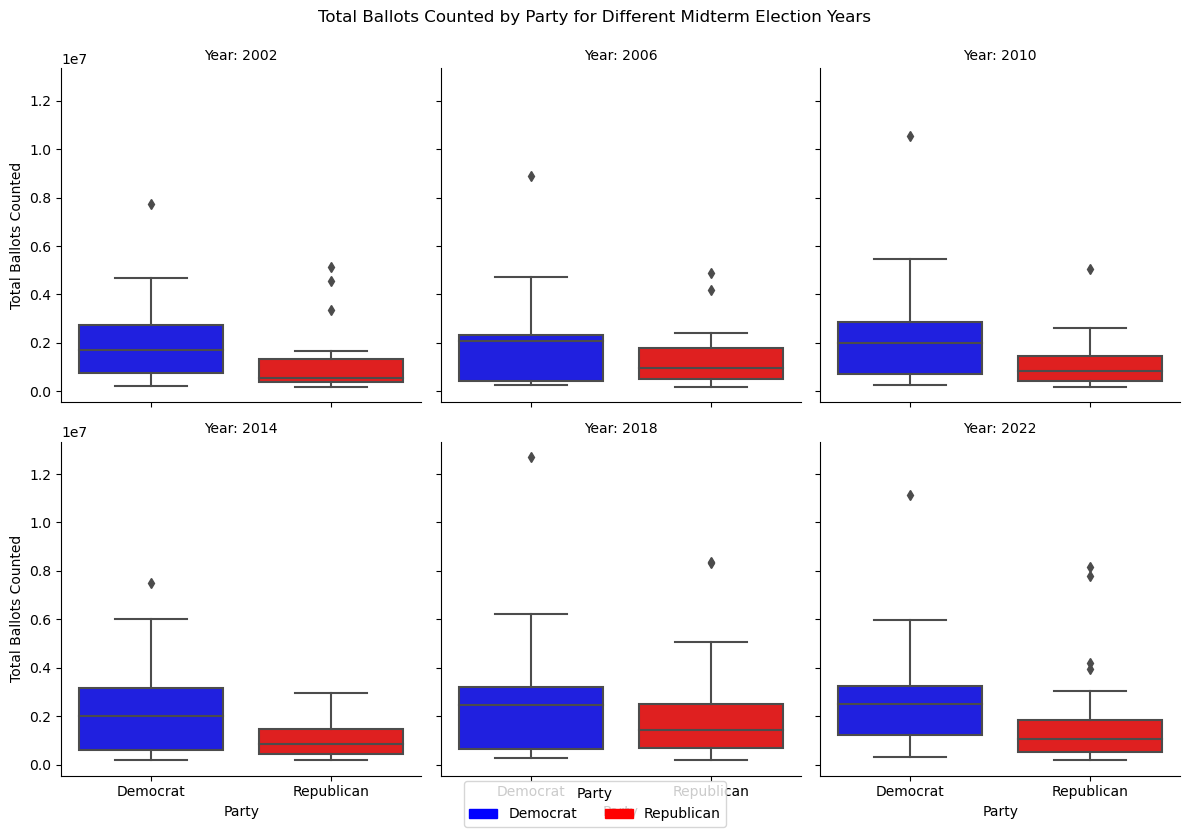

In [68]:

# Set the color palette
party_palette = {'Democrat': 'blue', 'Republican': 'red'}

# Create the FacetGrid with two rows by setting col_wrap to 3
g = sns.FacetGrid(midterms, col='Year', col_wrap=3, sharey=True, height=4)

# Map the boxplots to the grid, specifying the color for each party
g.map(sns.boxplot, 'Party', 'Total Ballots Counted', order=['Democrat', 'Republican'],
      palette=party_palette)

g.set_axis_labels('Party', 'Total Ballots Counted')
g.set_titles('Year: {col_name}')
g.fig.suptitle('Total Ballots Counted by Party for Different Midterm Election Years', y=1.03)

handles = [plt.Rectangle((0,0),1,1, color=party_palette[party]) for party in party_palette.keys()]
labels = party_palette.keys()
g.fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, 0), title='Party')


plt.show()

/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samanthamacdonald/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

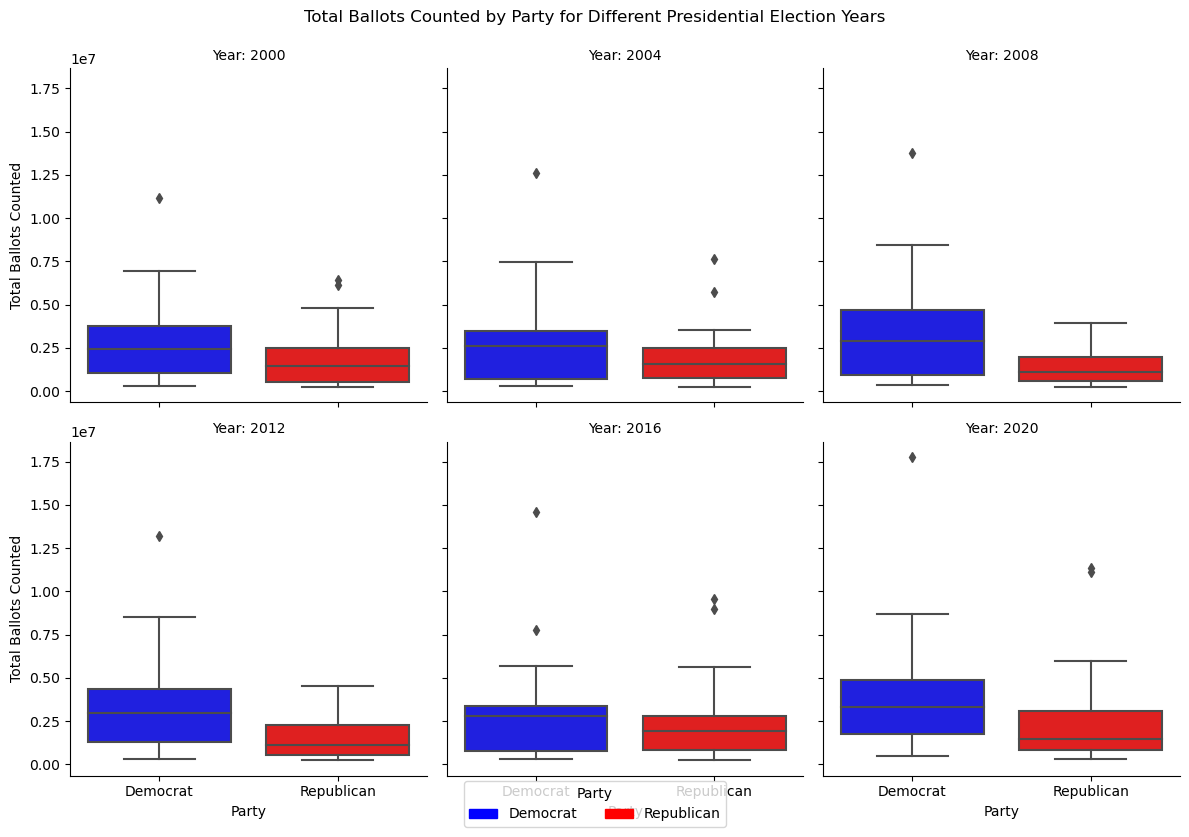

In [69]:
presidentials['Total Ballots Counted'] = presidentials['Total Ballots Counted'].astype(str)

presidentials['Total Ballots Counted'] = pd.to_numeric(
    presidentials['Total Ballots Counted'].str.replace(',', ''), errors='coerce'
)

party_palette = {'Democrat': 'blue', 'Republican': 'red'}

# Create the FacetGrid with two rows by setting col_wrap to 3
g = sns.FacetGrid(presidentials, col='Year', col_wrap=3, sharey=True, height=4)

# Map the boxplots to the grid, specifying the color for each party
g.map(sns.boxplot, 'Party', 'Total Ballots Counted', order=['Democrat', 'Republican'],
      palette=party_palette)

g.set_axis_labels('Party', 'Total Ballots Counted')
g.set_titles('Year: {col_name}')
g.fig.suptitle('Total Ballots Counted by Party for Different Presidential Election Years', y=1.03)

handles = [plt.Rectangle((0,0),1,1, color=party_palette[party]) for party in party_palette.keys()]
labels = party_palette.keys()
g.fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, 0), title='Party')



In [84]:
all_generals = [general12, general11, general10, general9, general8, general7, general6, 
                general5, general4, general3, general2, general1]  # 2002 to 2022 midterms

# Correct years for the midterms, in matching order
all_years = [2000, 2002, 2004, 2006, 2008,  2010, 2012, 2014, 2016, 2018, 2020, 2022]

# Define the columns to extract
columns_to_extract = ['State', 'Total Ballots Counted', 'Voting-Eligible Population (VEP)',
                      'Voting-Age Population (VAP)', 'Party']

# Create a new list for the processed data frames
processed_generals = []

for df, year in zip(all_generals, all_years):
    df = df.copy()  # Make a copy to avoid modifying the original data frames
    df['Year'] = year
    df = df[columns_to_extract + ['Year']]
    # Remove rows with states that have an asterisk
    df = df[~df['State'].str.contains('\*')]
    # Remove commas from the 'Total Ballots Counted', replace NaN with 0, and convert to integer
    df['Total Ballots Counted'] = df['Total Ballots Counted'].str.replace(',', '').replace(np.nan, 0).astype(int)
    processed_generals.append(df)

# Concatenate the processed data frames
all_elections = pd.concat(processed_generals, ignore_index=True)

all_elections['Election Type'] = all_elections['Year'].apply(lambda x: 'Presidential' if x % 4 == 0 else 'Midterm')

turnout_data = all_elections.groupby(['State', 'Election Type'])['Total Ballots Counted'].sum().unstack()

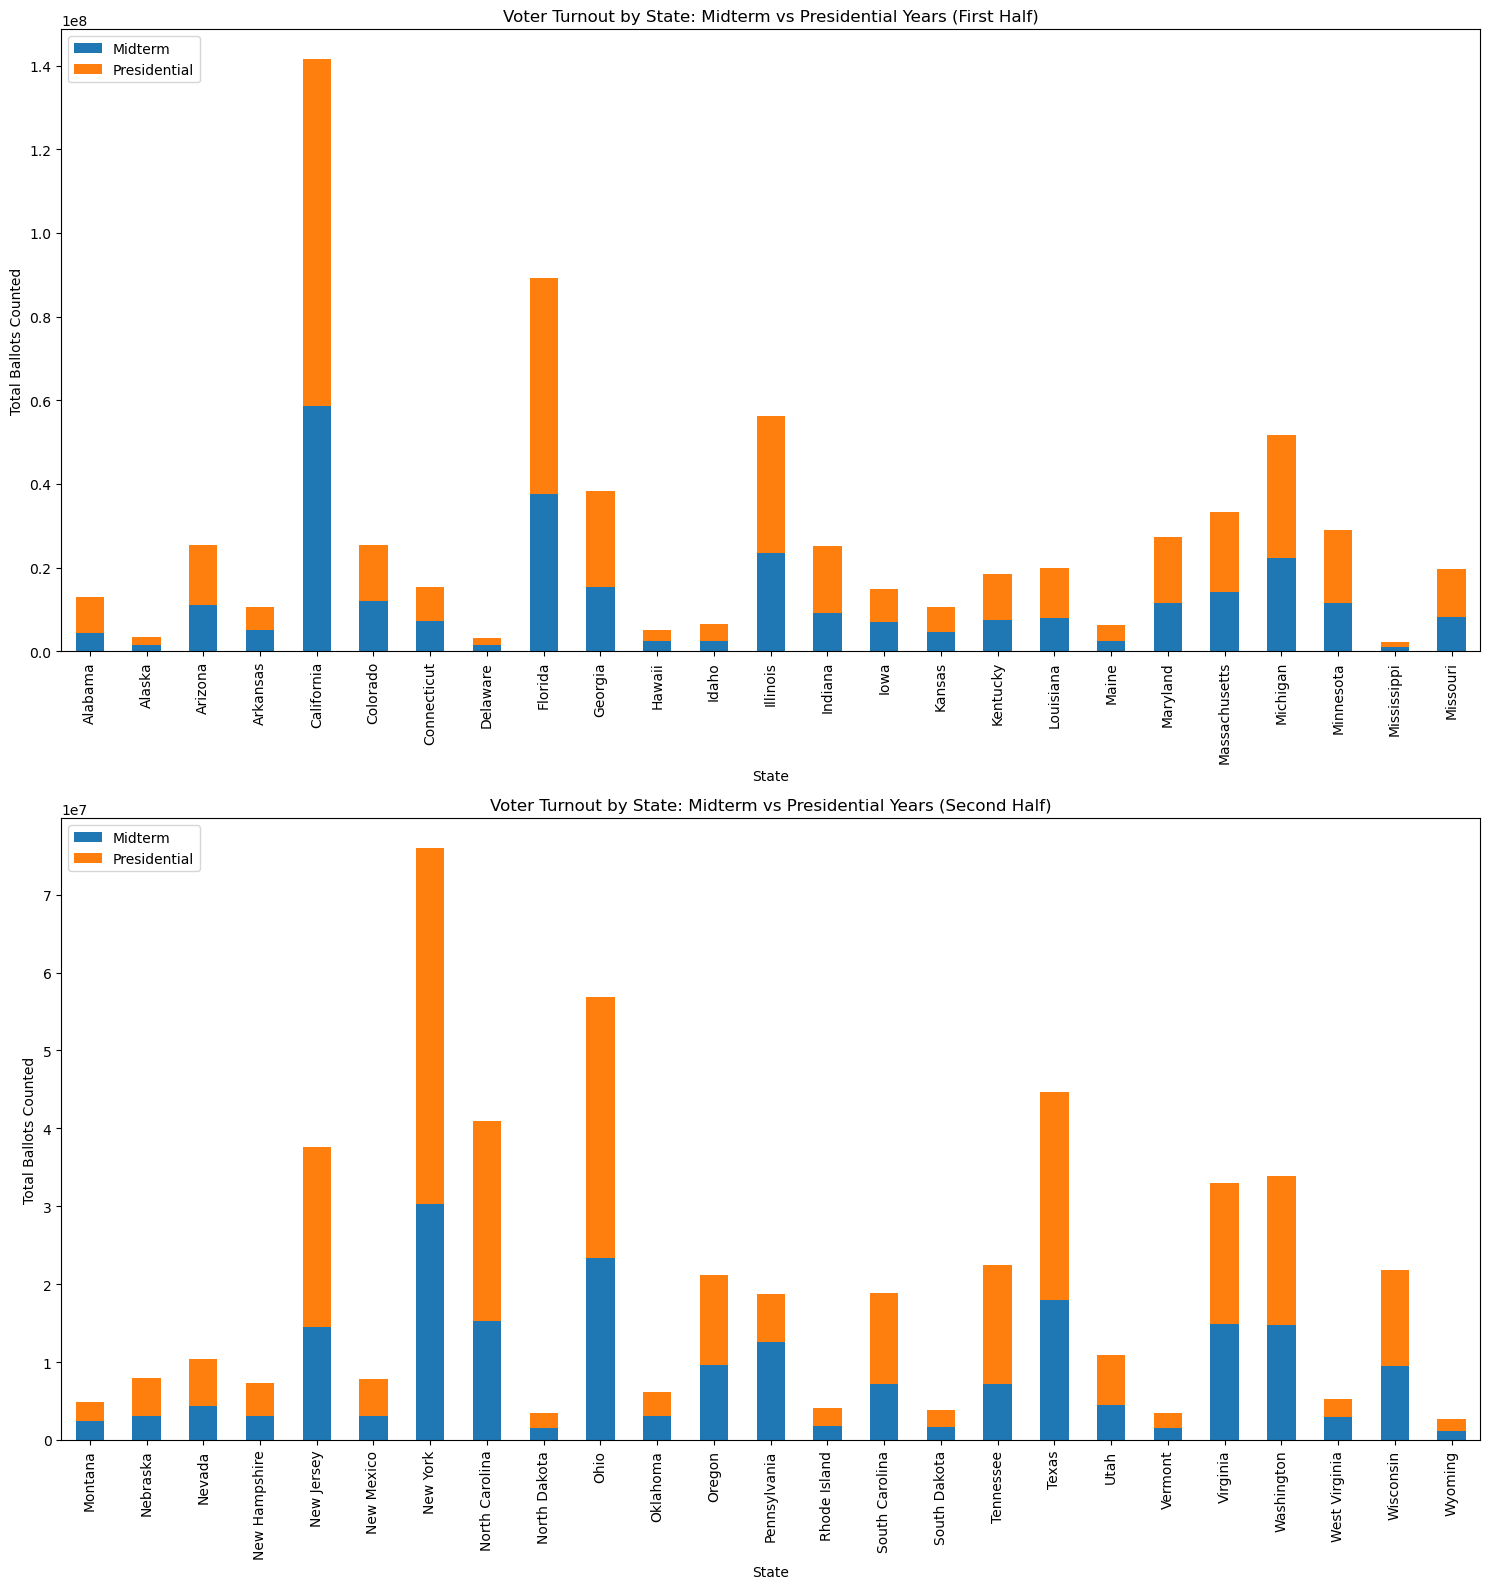

In [83]:
turnout_data = turnout_data[turnout_data.index != 'United States']

states = turnout_data.index.unique()

midpoint = len(states) // 2
states_first_half = states[:midpoint]
states_second_half = states[midpoint:]

fig, axs = plt.subplots(2, 1, figsize=(15, 16))

turnout_data.loc[states_first_half].plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Voter Turnout by State: Midterm vs Presidential Years (First Half)')
axs[0].set_xlabel('State')
axs[0].set_ylabel('Total Ballots Counted')
axs[0].legend(loc='upper left')

turnout_data.loc[states_second_half].plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Voter Turnout by State: Midterm vs Presidential Years (Second Half)')
axs[1].set_xlabel('State')
axs[1].set_ylabel('Total Ballots Counted')
axs[1].legend(loc='upper left')

plt.tight_layout()

plt.show()

## Global Election Info 

In [86]:
from selenium import webdriver 
import pandas as pd 
from selenium.webdriver.chrome.service import Service as ChromeService 
from webdriver_manager.chrome import ChromeDriverManager 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


In [87]:
url = "https://www.kff.org/other/state-indicator/number-of-individuals-who-voted-in-thousands-and-individuals-who-voted-as-a-share-of-the-voter-population-by-age/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D"

In [88]:
driver = webdriver.Chrome(service = ChromeService(ChromeDriverManager().install())) 

In [89]:
driver.get(url) 

In [90]:
table_container = driver.find_element(By.XPATH, './/div[contains(@class, "tab-container ngDcCtrl")]')

In [91]:
table = table_container.find_element(By.XPATH, './/div[contains(@class, "tab-contentx")]')

In [92]:
table

<selenium.webdriver.remote.webelement.WebElement (session="80bf44677916617909017729399416ec", element="14253188C0BD557385EE566A82625B21_element_38")>

In [97]:
df_list = []
for item in table.find_elements(By.XPATH, ".//div[contains(@class, 'ag-cell')]"):
    df_list.append(item.text)

In [100]:
df_list

['United States',
 'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '7,372',
 '15,396',
 '18,401',
 '43,661',
 '37,086',
 '121,916',
 '',
 '',
 '',
 '77',
 '158',
 '270',
 '660',
 '523',
 '1,688',
 '',
 '',
 '',
 '16',
 '36',
 '46',
 '112',
 '72',
 '282',
 '',
 '',
 '',
 '170',
 '300',
 '428',
 '975',
 '971',
 '2,844',
 '',
 '',
 '',
 '57',
 '100',
 '144',
 '368',
 '292',
 '961',
 '',
 '',
 '',
 '900',
 '1,970',
 '2,132',
 '4,343',
 '3,699',
 '13,044',
 '',
 '',
 '',
 '158',
 '437',
 '490',
 '1,001',
 '601',
 '2,687',
 '',
 '',
 '',
 '70',
 '146',
 '123',
 '556',
 '359',
 '1,253',
 '',
 '',
 '',
 '25',
 '39',
 '44',
 '122',
 '180',
 '409',
 '',
 '',
 '',
 '23',
 '77',
 '52',


In [101]:
driver.quit()